Data Scrapped from times of india and the hindu

Using GeoCoding Found the Lat and Long of the cities

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
ndata=pd.read_excel('updated_articlesexcel.xlsx')
ndata.head()

,article_body,category,city,date,heading,sentiment,link,paper,lat,long,state
0,The currency demonetization came as a surprise...,entertainment,NaN,"Updated: Jan 24, 2017, 12.52 PM IST",Kannada film shoots stalled because of demonet...,-1,http://timesofindia.indiatimes.com//entertainm...,toi,NaN,NaN,NaN
1,CHENNAI: Travellers and tourists had a tough t...,city,chennai,"Nov 10, 2016, 01.47 AM IST","Demonetisation puts tourists in trouble, spoil...",-1,http://timesofindia.indiatimes.com//city/chenn...,toi,13.082680,80.270718,Tamil Nadu
2,PANAJI: Fortunes of the five offshore casino o...,city,goa,"Updated: Nov 10, 2016, 12.28 PM IST",Currency demonetization puts odds against casinos,-1,http://timesofindia.indiatimes.com//city/goa/C...,toi,15.299326,74.123996,Goa
3,Even as gold prices surged to a four-month hig...,business,NaN,"Nov 10, 2016, 04.00 AM IST","Demonetisation hits jewellery, realty stocks",-1,http://timesofindia.indiatimes.com//business/i...,toi,NaN,NaN,NaN
4,"Nagpur: Like most parts of the country, the ci...",city,nagpur,"Nov 10, 2016, 04.23 AM IST",Vid towns witness chaos following demonetization,-1,http://timesofindia.indiatimes.com//city/nagpu...,toi,21.145800,79.088155,Maharashtra


In [3]:
ndata.loc[(ndata['category']=='city')&(ndata['city']=='goa'),['heading','link']]

,heading,link
2,Currency demonetization puts odds against casinos,http://timesofindia.indiatimes.com//city/goa/C...
19,Demonetization deals blow to computer hardware...,http://timesofindia.indiatimes.com//city/goa/D...
31,"Demonetization hits matka, some agents take ‘h...",http://timesofindia.indiatimes.com//city/goa/D...
41,"Demonetization: Now, Goans look to digitize th...",http://timesofindia.indiatimes.com//city/goa/D...
70,Demonetization hits senior citizens,http://timesofindia.indiatimes.com//city/goa/D...
98,"Take demonetized notes or lose change, hotelie...",http://timesofindia.indiatimes.com//city/goa/T...
106,Demonetization hits operations in lower courts...,http://timesofindia.indiatimes.com//city/goa/D...
177,Hinterlands grapple with demonetization,http://timesofindia.indiatimes.com//city/goa/H...


In [4]:
temp=pd.crosstab(ndata['category'],ndata['sentiment'])

temp

sentiment,-1,0,1
category,,,
business,7,4,4
city,78,29,27
entertainment,3,1,11
india,8,12,12
sports,0,1,0
tv,0,1,0
world,0,1,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b52872e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f24b2ba5320>], dtype=object)

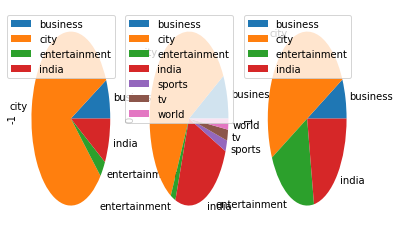

In [5]:
temp.plot(kind='pie',subplots=True)

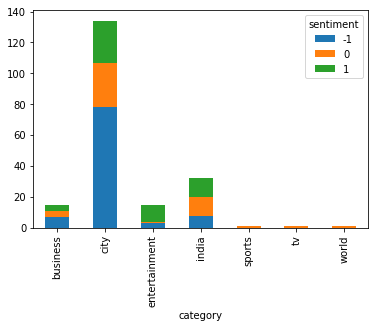

In [6]:
temp.plot(kind='bar',stacked=True)

In [7]:
pd.crosstab(ndata['city'],ndata['sentiment'])

sentiment,-1,0,1
city,,,
Bizarre-effects-of-demonetisation,0,1,0
ahmedabad,1,2,1
allahabad,2,0,0
bengaluru,4,0,1
bhopal,1,1,0
bhubaneswar,0,2,1
chandigarh,2,0,0
chennai,3,0,0
coimbatore,2,0,2


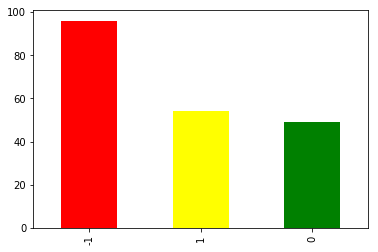

In [8]:
pd.value_counts(ndata['sentiment']).plot(kind='bar',color=['Red','Yellow','Green'])

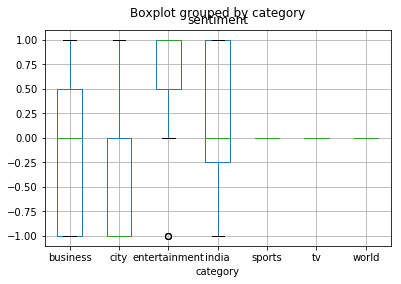

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

ndata.boxplot(column='sentiment',by='category')


In [10]:
from mpl_toolkits.basemap import Basemap
m=Basemap(projection='mill',llcrnrlat=ndata.lat.min()-2,urcrnrlat=ndata.lat.max()+2,llcrnrlon=ndata.long.min()-2,urcrnrlon=ndata.long.max()+2,resolution='c',epsg=4269)
x,y=m(tuple(ndata.long[(ndata.long.isnull()==False)]),tuple(ndata.lat[(ndata.lat.isnull()==False)]))


http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=70.5713621,6.524139099999999,95.60531630000001,32.7333148&bboxSR=4269&imageSR=4269&size=400,418&dpi=96&format=png32&f=image


/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


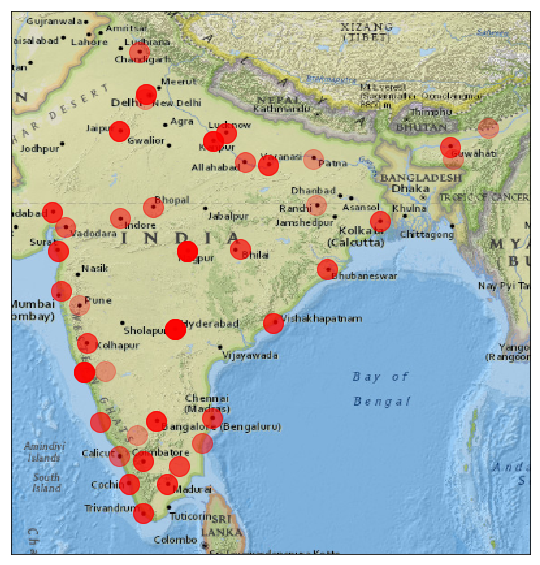

In [11]:
plt.figure(figsize=(20,10))
m.arcgisimage(service="NatGeo_World_Map", verbose=True)
m.plot(x,y,'ro',markersize=20, alpha=0.3 )

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=70.5713621,6.524139099999999,95.60531630000001,32.7333148&bboxSR=4269&imageSR=4269&size=400,418&dpi=96&format=png32&f=image


/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/manobhav/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


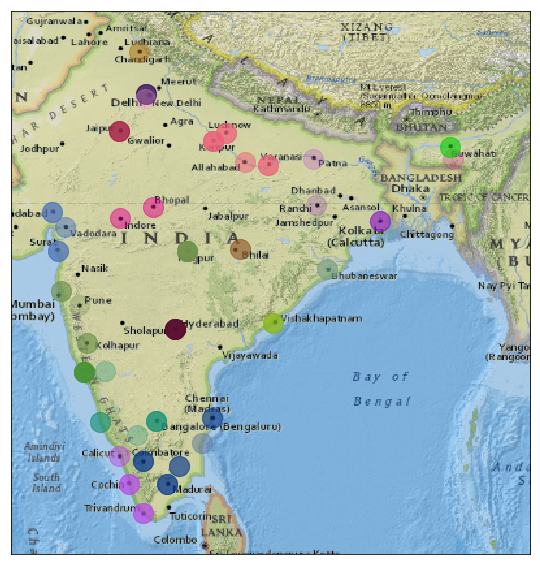

In [12]:
color = np.random.rand(ndata.state[(ndata.long.isnull()==False)].unique().shape[0], 3)
plt.figure(figsize=(20,10))
m1=Basemap(projection='mill',llcrnrlat=ndata.lat.min()-2,urcrnrlat=ndata.lat.max()+2,llcrnrlon=ndata.long.min()-2,urcrnrlon=ndata.long.max()+2,resolution='c',epsg=4269)
m1.arcgisimage(service="NatGeo_World_Map", verbose=True)
c = 0
for i in ndata.state[(ndata.long.isnull()==False)].unique():
    x1, y1 = m(tuple(ndata.long[(ndata.long.isnull()==False) & (ndata.state == i)]), \
         tuple(ndata.lat[(ndata.lat.isnull() == False) & (ndata.state == i)]))
    m1.plot(x1,y1,'ro',markersize=20,alpha=0.3, color = color[c] )
    c += 1


In [13]:
%config IPCompleter.greedy=True

In [14]:
def myfunc(x):
    if x.split(' ')[0]=='Updated:':
        s=(' ').join(x.split(' ')[1:])
    else:
        s=x
    return pd.to_datetime(s,format="%b %d, %Y, %I.%M %p %Z")
    

ndata.date=ndata.date.apply(myfunc)

In [15]:
ndata['year']=ndata.date.dt.year
ndata['month']=ndata.date.dt.month
ndata['day']=ndata.date.dt.day
ndata.head()

,article_body,category,city,date,heading,sentiment,link,paper,lat,long,state,year,month,day
0,The currency demonetization came as a surprise...,entertainment,NaN,2017-01-24 12:52:00,Kannada film shoots stalled because of demonet...,-1,http://timesofindia.indiatimes.com//entertainm...,toi,NaN,NaN,NaN,2017,1,24
1,CHENNAI: Travellers and tourists had a tough t...,city,chennai,2016-11-10 01:47:00,"Demonetisation puts tourists in trouble, spoil...",-1,http://timesofindia.indiatimes.com//city/chenn...,toi,13.082680,80.270718,Tamil Nadu,2016,11,10
2,PANAJI: Fortunes of the five offshore casino o...,city,goa,2016-11-10 12:28:00,Currency demonetization puts odds against casinos,-1,http://timesofindia.indiatimes.com//city/goa/C...,toi,15.299326,74.123996,Goa,2016,11,10
3,Even as gold prices surged to a four-month hig...,business,NaN,2016-11-10 04:00:00,"Demonetisation hits jewellery, realty stocks",-1,http://timesofindia.indiatimes.com//business/i...,toi,NaN,NaN,NaN,2016,11,10
4,"Nagpur: Like most parts of the country, the ci...",city,nagpur,2016-11-10 04:23:00,Vid towns witness chaos following demonetization,-1,http://timesofindia.indiatimes.com//city/nagpu...,toi,21.145800,79.088155,Maharashtra,2016,11,10


In [16]:
group=ndata.groupby(['year','month'])['day'].count()
group.head(20)

year  month
2016  11       185
2017  1         11
      2          3
Name: day, dtype: int64

Show the Classifier Scikit and nltk